In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

YR   = 365.2563

In [2]:
name = "3_bodies.txt"

try:
    data = np.genfromtxt(name)
except ValueError as err:
    try:
        data = np.genfromtxt(name, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data.shape)
N = data.shape[0]

df = pd.DataFrame(data)
df = df.rename(columns=dict(
    zip(df.columns,
     ["s0", "o0",
     "a1", "K1", "s1", "o1", "H1",
     "a2", "K2", "s2", "o2", "H2",
     "n1", "n2",
     "t", "dt", "dt_adap"])
    ))
df.t       /= YR
df.dt      /= YR
df.dt_adap /= YR
df["e1"] = np.sqrt(df.K1**2 + df.H1**2)
df["e2"] = np.sqrt(df.K2**2 + df.H2**2)
df["w1"] = np.arctan2(df.H1, df.K1)
df["w2"] = np.arctan2(df.H2, df.K2)
display(df)

Shape: (4820, 17)


,s0,o0,a1,K1,s1,o1,H1,a2,K2,s2,...,H2,n1,n2,t,dt,dt_adap,e1,e2,w1,w2
0,0.224399,0.436332,0.050000,0.100000,628.318562,1.396263e+00,0.000000,0.200000,-0.100000,628.318562,...,-8.742278e-09,1.538605,0.192417,0.000000e+00,9.999999e-05,0.000100,0.100000,0.100000,0.000000,-3.141593
1,0.224399,0.436332,0.050000,0.100000,628.305983,1.396267e+00,0.000002,0.200000,-0.100000,628.318562,...,-1.533627e-08,1.538605,0.192417,2.800000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000024,-3.141593
2,0.224399,0.436332,0.050000,0.100000,628.305534,1.396267e+00,0.000002,0.200000,-0.100000,628.318562,...,-1.557177e-08,1.538605,0.192417,2.900000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000025,-3.141592
3,0.224399,0.436332,0.050000,0.100000,628.305084,1.396267e+00,0.000003,0.200000,-0.100000,628.318562,...,-1.580727e-08,1.538605,0.192417,3.000000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000026,-3.141592
4,0.224399,0.436332,0.050000,0.100000,628.304635,1.396267e+00,0.000003,0.200000,-0.100000,628.318562,...,-1.604277e-08,1.538605,0.192417,3.100000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000027,-3.141592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,0.224400,0.436330,0.039435,0.013620,2.202818,1.000000e-15,0.016795,0.202417,0.063652,0.200574,...,7.849153e-02,2.196656,0.188982,4.888310e+09,2.753034e+07,50.372592,0.021624,0.101057,0.889399,0.889417
4816,0.224400,0.436330,0.039344,-0.020227,2.210416,1.000000e-15,-0.007420,0.202417,-0.094857,0.200570,...,-3.479882e-02,2.204276,0.188982,4.915997e+09,2.768626e+07,26.098922,0.021545,0.101039,-2.790000,-2.789982
4817,0.224400,0.436330,0.039252,-0.000715,2.218170,1.000000e-15,0.021453,0.202417,-0.003365,0.200566,...,1.009641e-01,2.212054,0.188982,4.943840e+09,2.784307e+07,56.048486,0.021465,0.101020,1.604093,1.604112
4818,0.224400,0.436330,0.039158,0.001456,2.226086,1.000000e-15,0.021335,0.202417,0.006877,0.200562,...,1.007669e-01,2.219995,0.188982,4.971840e+09,2.800077e+07,49.778400,0.021384,0.101001,1.502639,1.502659


In [3]:
name2 = "2_bodies.txt"
try:
    data2 = np.genfromtxt(name2)
except ValueError as err:
    try:
        data2 = np.genfromtxt(name2, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data2.shape)
N2 = data2.shape[0]

df2 = pd.DataFrame(data2)
df2 = df2.rename(columns=dict(
    zip(df2.columns,
     ["s0", "o0",
     "a1", "K1", "s1", "o1", "H1",
     "a2", "K2", "s2", "o2", "H2",
     "n1", "n2",
     "t", "dt", "dt_adap"])
    ))
df2.t       /= YR
df2.dt      /= YR
df2.dt_adap /= YR
df2["e1"] = np.sqrt(df2.K1**2 + df2.H1**2)
df2["e2"] = np.sqrt(df2.K2**2 + df2.H2**2)
df2["w1"] = np.arctan2(df2.H1, df2.K1)
df2["w2"] = np.arctan2(df2.H2, df2.K2)
display(df2)

Shape: (4820, 17)


,s0,o0,a1,K1,s1,o1,H1,a2,K2,s2,...,H2,n1,n2,t,dt,dt_adap,e1,e2,w1,w2
0,0.224399,0.436332,0.050000,1.000000e-01,628.318562,1.396263e+00,0.000000e+00,0.2,-0.1,628.318562,...,-8.742278e-09,1.538605,0.192417,0.000000e+00,9.999999e-05,0.000100,1.000000e-01,0.1,0.000000e+00,-3.141593
1,0.224399,0.436332,0.050000,1.000000e-01,628.305981,1.396267e+00,9.319234e-08,0.2,-0.1,628.318562,...,-8.742278e-09,1.538605,0.192417,2.800000e-03,9.999999e-05,0.001000,1.000000e-01,0.1,9.319234e-07,-3.141593
2,0.224399,0.436332,0.050000,1.000000e-01,628.305532,1.396267e+00,9.652064e-08,0.2,-0.1,628.318562,...,-8.742278e-09,1.538605,0.192417,2.900000e-03,9.999999e-05,0.001000,1.000000e-01,0.1,9.652064e-07,-3.141593
3,0.224399,0.436332,0.050000,1.000000e-01,628.305083,1.396267e+00,9.984894e-08,0.2,-0.1,628.318562,...,-8.742278e-09,1.538605,0.192417,3.000000e-03,9.999999e-05,0.001000,1.000000e-01,0.1,9.984894e-07,-3.141593
4,0.224399,0.436332,0.050000,1.000000e-01,628.304633,1.396267e+00,1.031772e-07,0.2,-0.1,628.318562,...,-8.742278e-09,1.538605,0.192417,3.100000e-03,9.999999e-05,0.001000,1.000000e-01,0.1,1.031772e-06,-3.141593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,0.224400,0.436332,0.049478,-4.301860e-32,1.563038,1.000000e-15,-2.910568e-32,0.2,-0.1,628.318562,...,-8.742278e-09,1.563038,0.192417,4.888310e+09,2.753034e+07,477.785627,5.193978e-32,0.1,-2.546756e+00,-3.141593
4816,0.224400,0.436332,0.049477,1.015901e-32,1.563045,1.000000e-15,3.345044e-32,0.2,-0.1,628.318562,...,-8.742278e-09,1.563045,0.192417,4.915997e+09,2.768626e+07,6563.065427,3.495908e-32,0.1,1.275946e+00,-3.141593
4817,0.224400,0.436332,0.049477,-1.374391e-32,1.563052,1.000000e-15,1.903348e-32,0.2,-0.1,628.318562,...,-8.742278e-09,1.563052,0.192417,4.943840e+09,2.784307e+07,356.116930,2.347698e-32,0.1,2.196195e+00,-3.141593
4818,0.224400,0.436332,0.049477,1.366218e-32,1.563058,1.000000e-15,7.796882e-33,0.2,-0.1,628.318562,...,-8.742278e-09,1.563058,0.192417,4.971840e+09,2.800077e+07,1231.950322,1.573043e-32,0.1,5.185899e-01,-3.141593


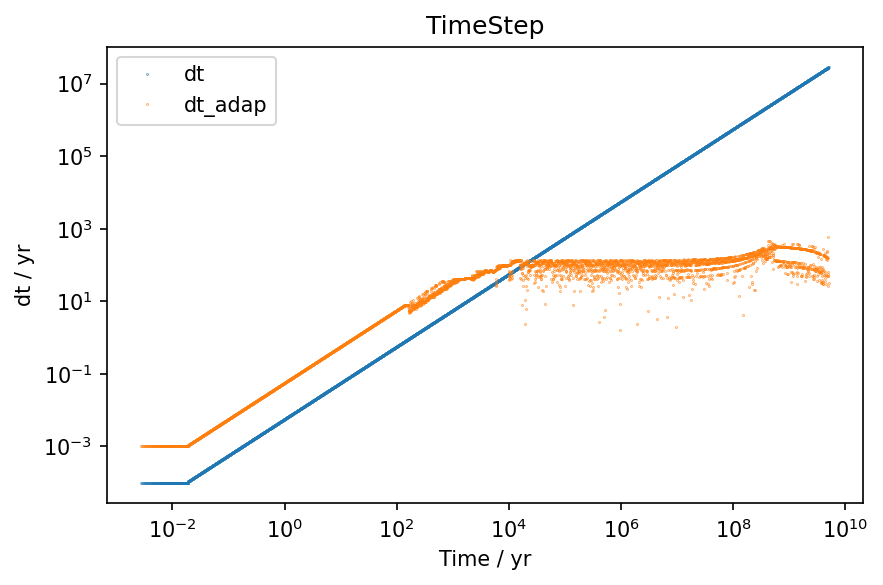

In [4]:
plt.figure(dpi=150)
plt.title("TimeStep")
plt.plot(df.t, df.dt, '.', ms=0.5, label='dt')
plt.plot(df.t, df.dt_adap, '.', ms=0.5, label='dt_adap')
plt.xlabel("Time / yr")
plt.ylabel("dt / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.show()

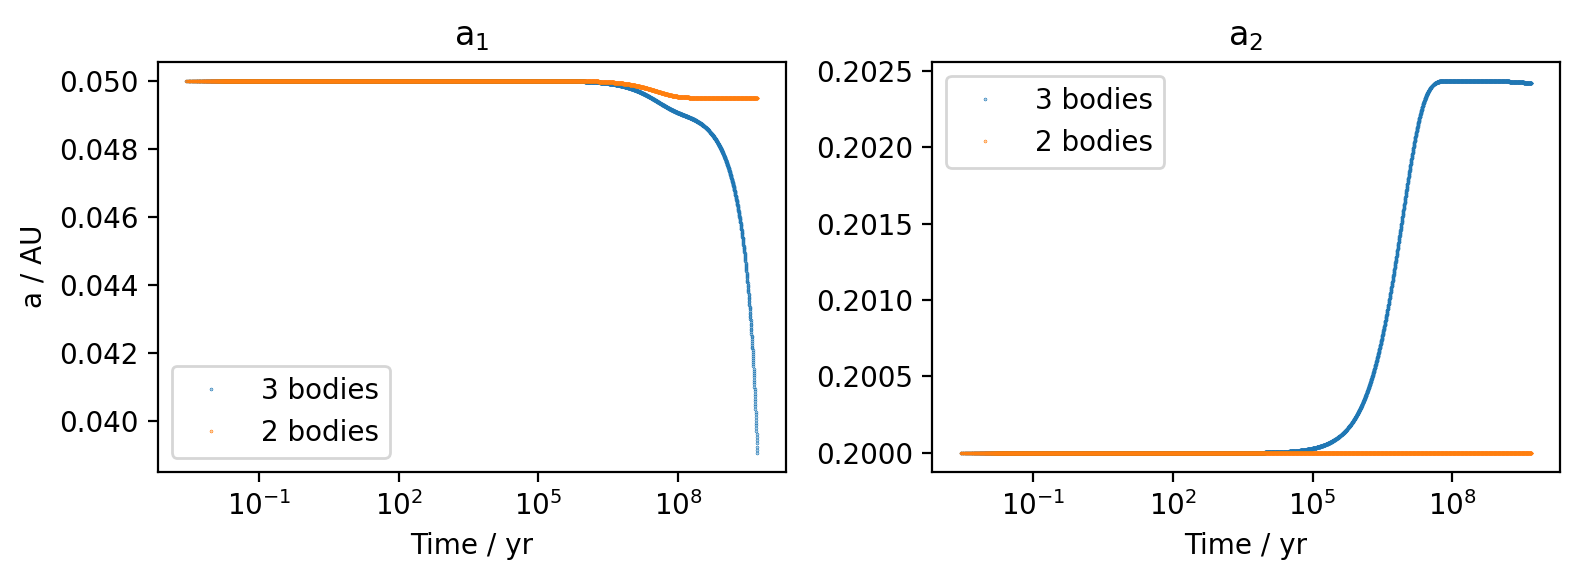

In [5]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("a$_1$")
plt.plot(df.t, df.a1, '.', ms=0.5,  label="3 bodies")
plt.plot(df2.t, df2.a1, '.', ms=0.5,  label="2 bodies")
plt.xlabel("Time / yr")
plt.ylabel("a / AU")
plt.semilogx()
plt.legend()
plt.subplot(1,2,2)
plt.title("a$_2$")
plt.plot(df.t, df.a2, '.', ms=0.5,  label='3 bodies')
plt.plot(df2.t, df2.a2, '.', ms=0.5,  label='2 bodies')
plt.xlabel("Time / yr")
plt.semilogx()
plt.legend()
plt.tight_layout()
plt.show()

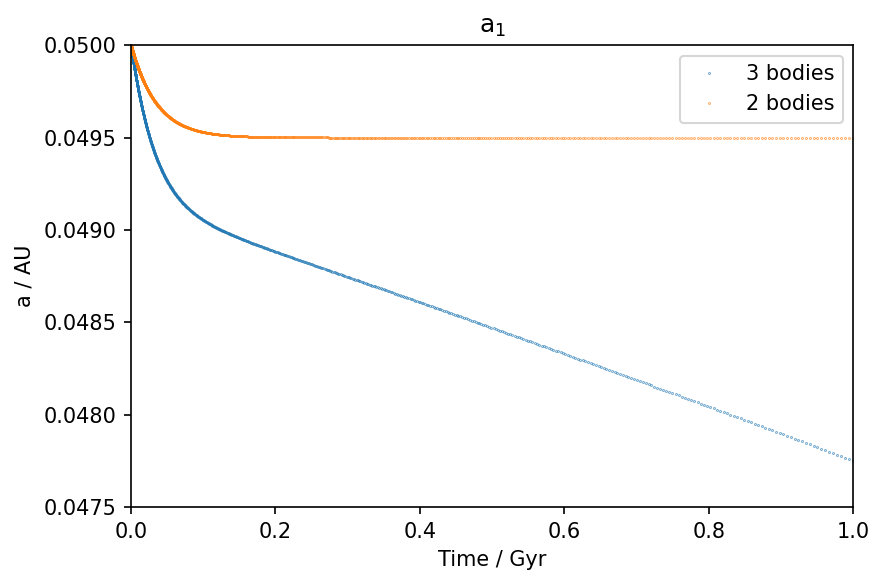

In [6]:
plt.figure(dpi=150)
plt.title("a$_1$")
plt.plot(df.t * 1e-9, df.a1, '.', ms=0.5,  label="3 bodies")
plt.plot(df2.t * 1e-9, df2.a1, '.', ms=0.5,  label="2 bodies")
plt.xlabel("Time / Gyr")
plt.ylabel("a / AU")
plt.xlim(0, 1)
plt.ylim(0.0475, 0.05)
plt.legend()
plt.tight_layout()
plt.show()

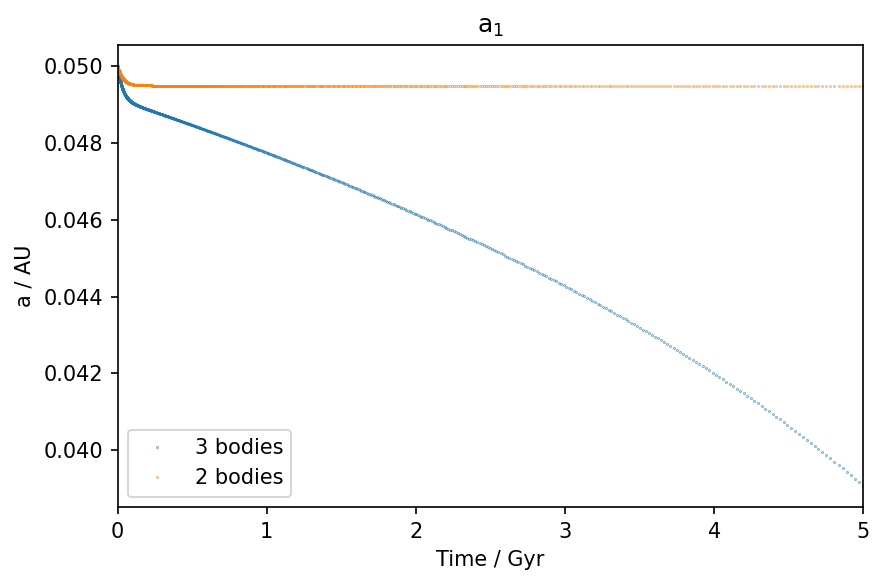

In [7]:
plt.figure(dpi=150)
plt.title("a$_1$")
plt.plot(df.t * 1e-9, df.a1, '.', ms=0.5,  label="3 bodies")
plt.plot(df2.t * 1e-9, df2.a1, '.', ms=0.5,  label="2 bodies")
plt.xlabel("Time / Gyr")
plt.ylabel("a / AU")
plt.xlim(0, 5)
plt.legend()
plt.tight_layout()
plt.show()

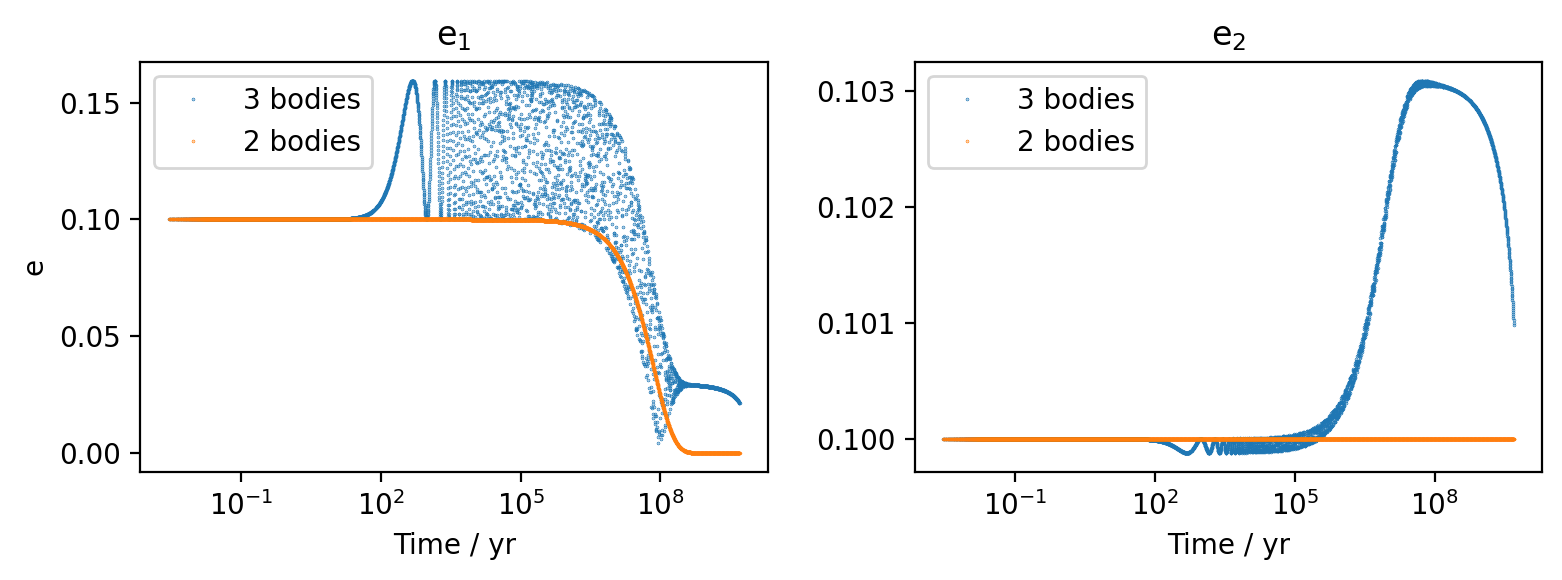

In [8]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("e$_1$")
plt.plot(df.t, df.e1, '.', ms=0.5,  label="3 bodies")
plt.plot(df2.t, df2.e1, '.', ms=0.5,  label="2 bodies")
plt.xlabel("Time / yr")
plt.ylabel("e")
plt.semilogx()
plt.legend()
plt.subplot(1,2,2)
plt.title("e$_2$")
plt.plot(df.t, df.e2, '.', ms=0.5,  label="3 bodies")
plt.plot(df2.t, df2.e2, '.', ms=0.5,  label="2 bodies")
plt.xlabel("Time / yr")
plt.semilogx()
plt.legend()
plt.tight_layout()
plt.show()

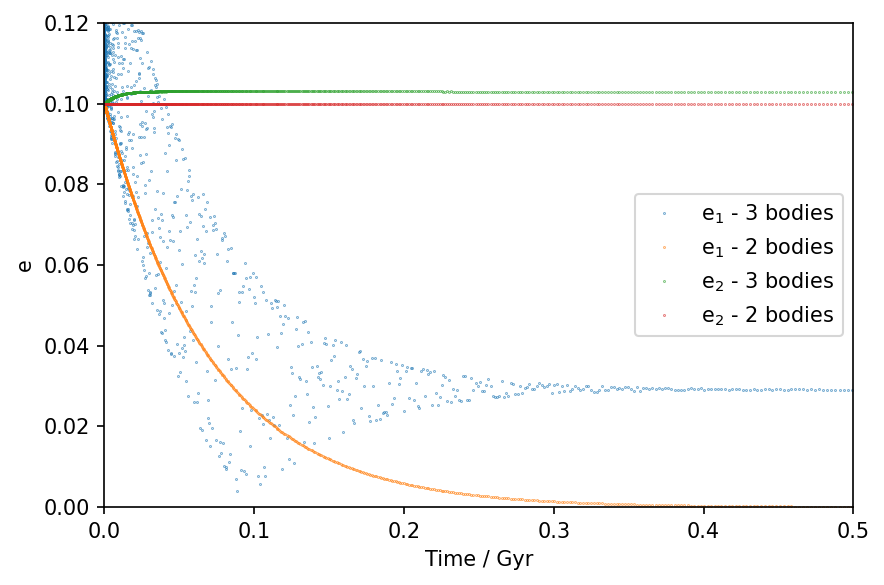

In [9]:
plt.figure(dpi=150)
plt.plot(df.t * 1e-9, df.e1, '.', ms=0.5, label="e$_1$ - 3 bodies")
plt.plot(df2.t * 1e-9, df2.e1, '.', ms=0.5, label="e$_1$ - 2 bodies")
plt.plot(df.t * 1e-9, df.e2, '.', ms=0.5, label="e$_2$ - 3 bodies")
plt.plot(df2.t * 1e-9, df2.e2, '.', ms=0.5, label="e$_2$ - 2 bodies")
plt.xlabel("Time / Gyr")
plt.ylabel("e")
plt.xlim(0, 0.5)
plt.ylim(0, 0.12)
plt.legend()
plt.tight_layout()
plt.show()

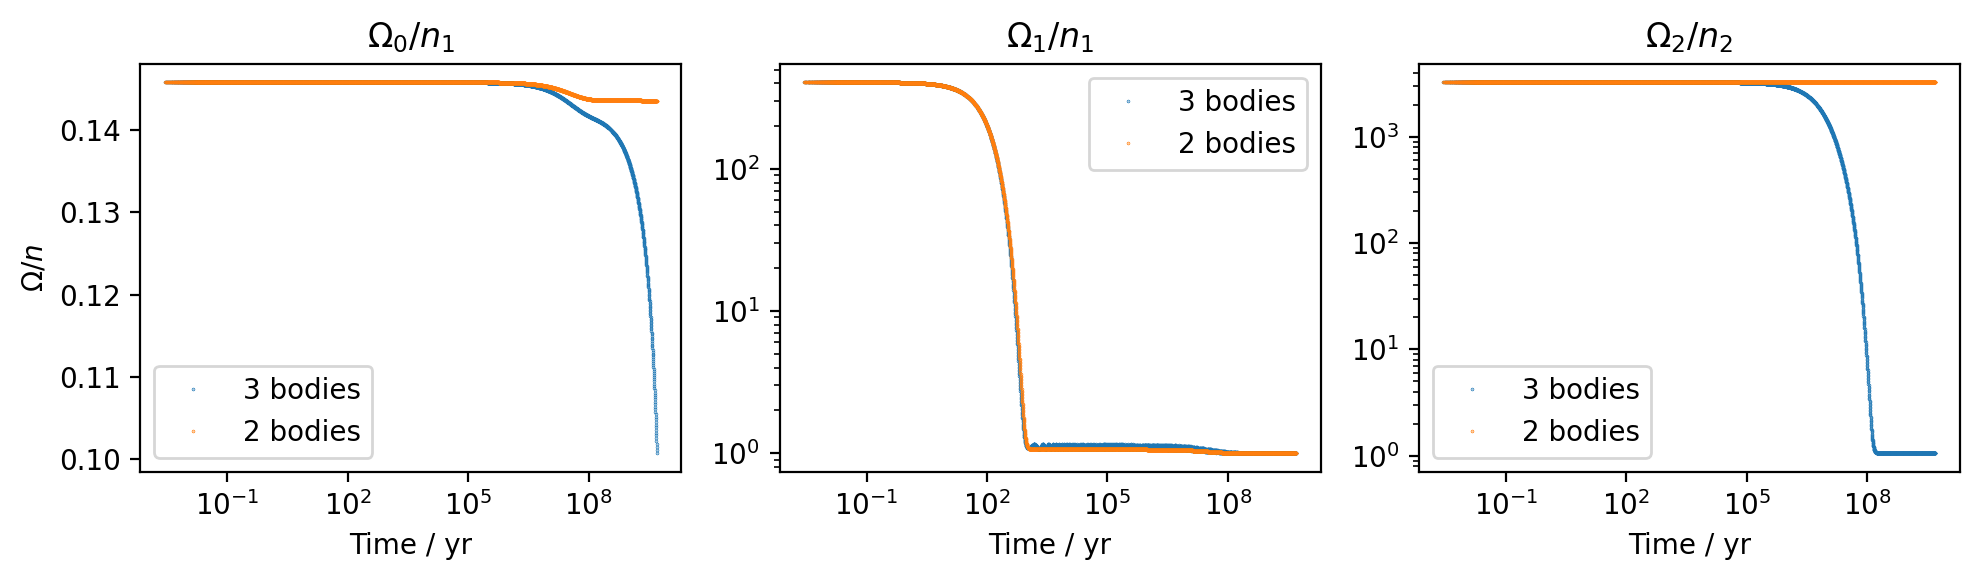

In [10]:
plt.figure(dpi=200, figsize=(10,3))
plt.subplot(1,3,1)
plt.title("$\Omega_0 / n_1$")
plt.plot(df.t, df.s0/df.n1, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.s0/df2.n1, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.ylabel("$\Omega / n$")
plt.semilogx()
plt.legend()
plt.subplot(1,3,2)
plt.title("$\Omega_1 / n_1$")
plt.plot(df.t, df.s1/df.n1, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.s1/df2.n1, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.subplot(1,3,3)
plt.title("$\Omega_2 / n_2$")
plt.plot(df.t, df.s2/df.n2, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.s2/df2.n2, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.show()

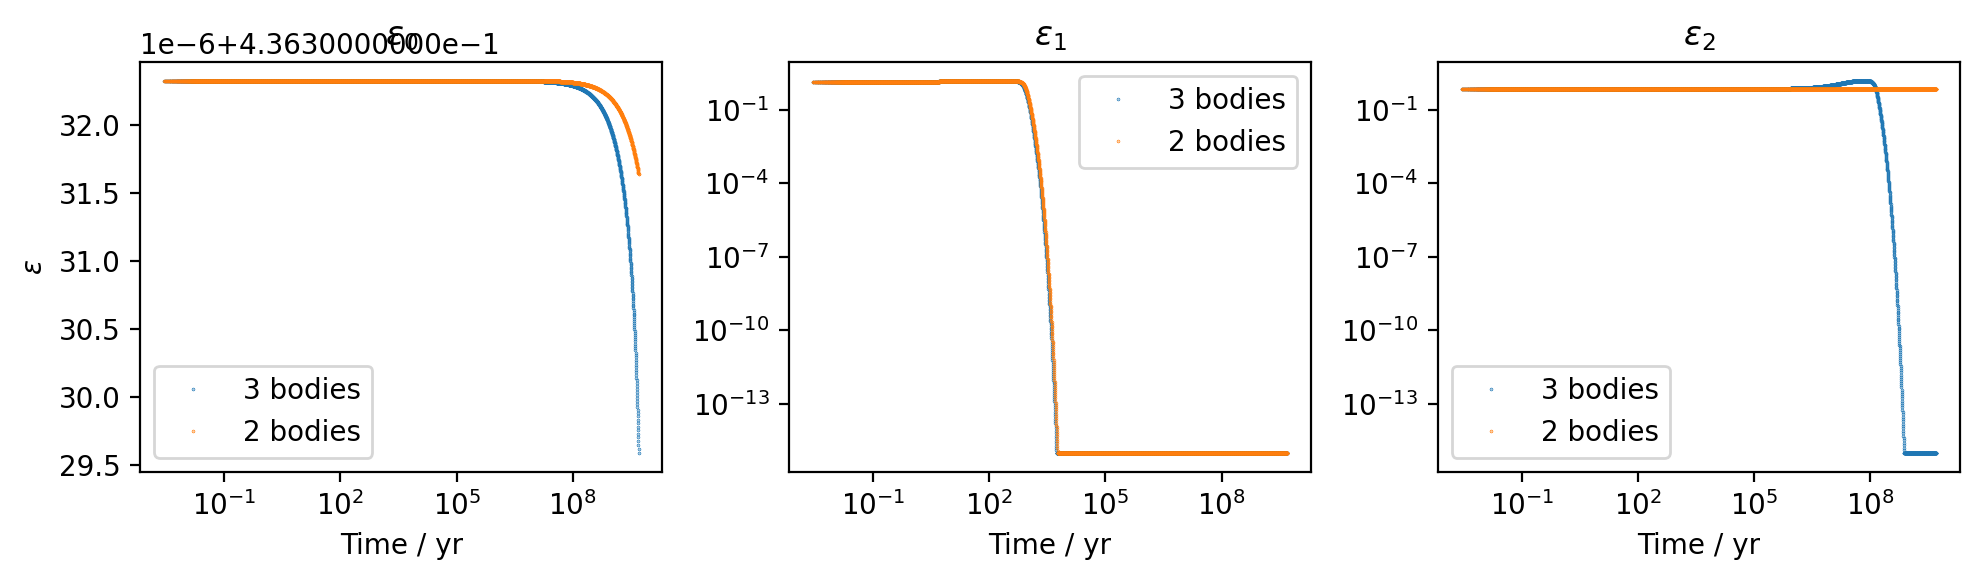

In [11]:
plt.figure(dpi=200, figsize=(10,3))
plt.subplot(1,3,1)
plt.title("$\epsilon_0$")
plt.plot(df.t, df.o0, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.o0, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.ylabel("$\epsilon$")
plt.semilogx()
plt.legend()
plt.subplot(1,3,2)
plt.title("$\epsilon_1$")
plt.plot(df.t, df.o1, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.o1, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.subplot(1,3,3)
plt.title("$\epsilon_2$")
plt.plot(df.t, df.o2, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.o2, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.show()

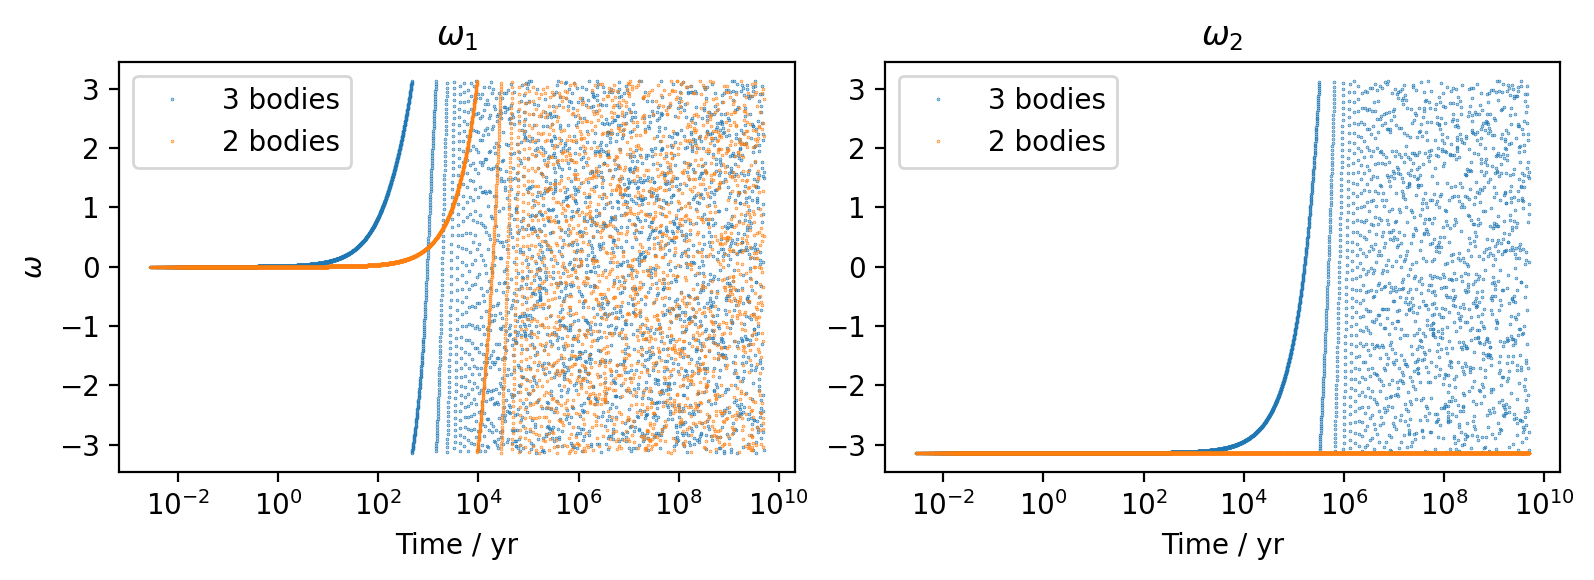

In [12]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("$\omega_1$")
plt.plot(df.t, df.w1, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.w1, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.ylabel("$\omega$")
plt.semilogx()
plt.legend()
plt.subplot(1,2,2)
plt.title("$\omega_2$")
plt.plot(df.t, df.w2, '.', ms=0.5, label="3 bodies")
plt.plot(df2.t, df2.w2, '.', ms=0.5, label="2 bodies")
plt.xlabel("Time / yr")
plt.semilogx()
plt.legend()
plt.tight_layout()
plt.show()

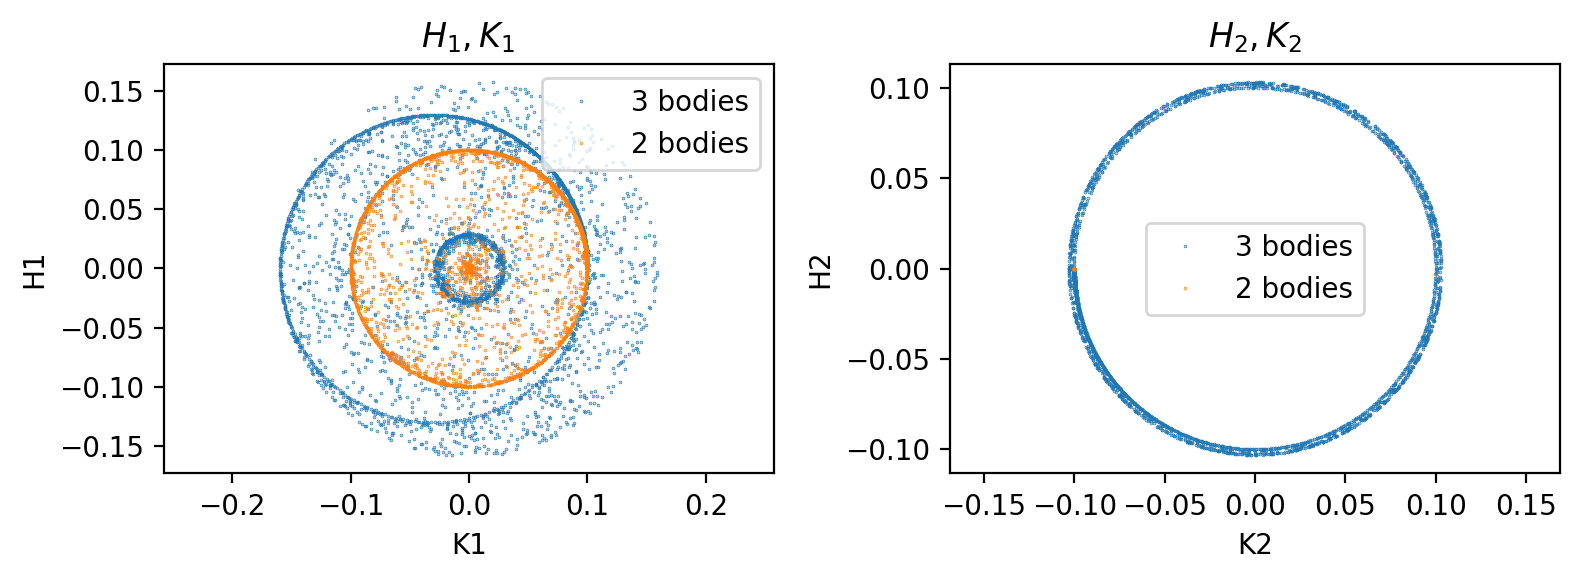

In [13]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("$H_1,K_1$")
plt.plot(df.K1, df.H1, '.', ms=0.5, label="3 bodies")
plt.plot(df2.K1, df2.H1, '.', ms=0.5, label="2 bodies")
plt.xlabel("K1")
plt.ylabel("H1")
plt.axis("equal")
plt.legend()
plt.subplot(1,2,2)
plt.title("$H_2,K_2$")
plt.plot(df.K2, df.H2, '.', ms=0.5, label="3 bodies")
plt.plot(df2.K2, df2.H2, '.', ms=0.5, label="2 bodies")
plt.xlabel("K2")
plt.ylabel("H2")
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()